## EE559 HW6

### Qirui Sun


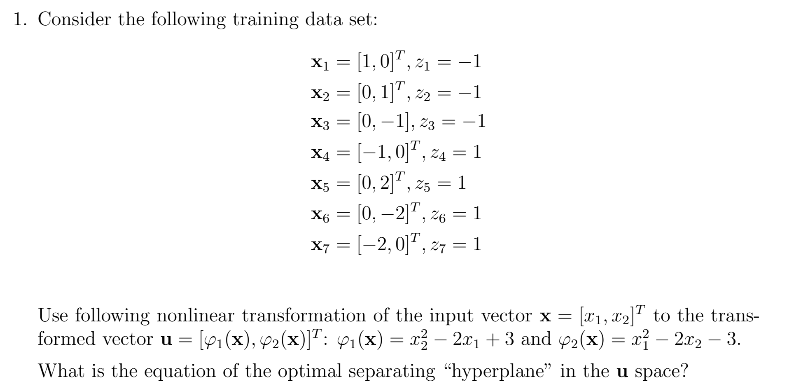

In [2]:
def fc(x1,x2):
    return [x2**2-2*x1+3,x1**2-2*x2-3]

In [3]:
X = {1:[1,0],2:[0,1],3:[0,-1],4:[-1,0],5:[0,2],6:[0,-2],7 :[-2,0]}
z = {1:-1,2:-1,3:-1,4:1,5:1,6:1,7:1}

u = dict()
for i in range(1,8):
    u[i] = fc(X[i][0],X[i][1])
    
u


{1: [1, -2],
 2: [4, -5],
 3: [4, -1],
 4: [5, -2],
 5: [7, -7],
 6: [7, 1],
 7: [7, 1]}

In [6]:
import numpy as np

x = np.array([])
y = np.array([])

for key in  u:
    x = np.append(x,u[key])
    y = np.append(y,z[key])

x = np.array(x.reshape(7,2))  
x

array([[ 1., -2.],
       [ 4., -5.],
       [ 4., -1.],
       [ 5., -2.],
       [ 7., -7.],
       [ 7.,  1.],
       [ 7.,  1.]])

From the figure, we know that the support vectors are
$$\{[4, -5],[4,-1],[5,-2]\}$$

In what follows we will use vectors augmented with a 1 as a bias input, and for clarity we will diﬀerentiate these with an over-tilde. So, if s1 = (10), then
s˜1 = (101).

So $$\tilde{x_2} = [4,-5,1]^T,\tilde{x_3} = [4,-1,1]^T,\tilde{x_4} = [5,-2,1]^T$$

$$
\begin{cases}
\alpha_1\tilde{x_2}^T\tilde{x_2} +\alpha_2\tilde{x_2}^T\tilde{x_3}+\alpha_3\tilde{x_2}^T\tilde{x_4}= -1\\
\alpha_1\tilde{x_3}^T\tilde{x_2} +\alpha_2\tilde{x_3}^T\tilde{x_3} +\alpha_3\tilde{x_3}^T\tilde{x_4} = -1\\
\alpha_1\tilde{x_4}^T\tilde{x_2}+\alpha_2\tilde{x_4}^T\tilde{x_3} +\alpha_3\tilde{x_4}^T\tilde{x_4} = 1
\end{cases}
$$

**For solve the equation,**
$$\alpha =\begin{bmatrix} -7.2500 & -39.7500  & 38.0000
\end{bmatrix}^T$$

$$\tilde{w} = \sum_{i\epsilon S}\alpha_ix_i\\
= −7.2500\times [4,-5,1]^T −39.7500\times[4,-1,1]^T+38.0000\times[5,-2,1]^T\\
= \begin{bmatrix}2.0000  \\  0.0000 \\  -9.0000
\end{bmatrix}
$$

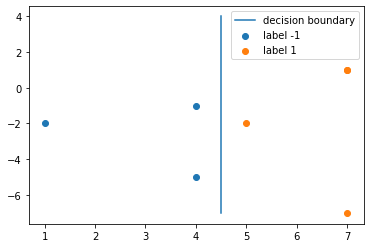

In [12]:
import matplotlib.pyplot as plt
w = [2,0]
w0 = 9

plt.scatter(x[:3,0],x[:3,1])
plt.scatter(x[3:,0],x[3:,1])

y = np.arange(-7,5)
x1 = 4.5*np.ones(12)

plt.plot(x1,y)
plt.legend(['decision boundary','label -1','label 1'])
plt.show()

In [78]:
def f(w,w0,u):
    if w[0]*u[0]+w[1]*u[1]+ w0 >=0:
        return 1
    else:
        return -1

In [96]:
for i in range(1,8):
    print(z[i] == f(w,w0,u[i]))

True
True
True
True
True
True
True


So $w = [1,0]^T$, $w_0 = -4.5$ **can reach the optimal seperating hyperplane**

#### 2. Consider the following training data set :

$$x_1 = [0,0]^T,z_1 = -1$$
$$x_2 = [1,0]^T,z_2 = 1$$
$$x_3 = [0,-1]^T,z_3 = 1$$
$$x_4 = [-1,0]^T,z_4 = 1$$

#### Note that in the following, you need to use equations that describe w and give rise to the dual optimization problem.

##### (a) Write down the dual optimization problem for training a Support Vector Machine with this data set using the polynomial kernel function 
$$κ(x_i,x_j) = (x_i^T x_j + 1)^2
$$

Owing to use the kernel function,
$$κ(x_i,x_j) = (x_i^T x_j + 1)^2$$
Supposing $$\phi(x_i)^T\phi(x_j) =κ(x_i,x_j) $$
$$κ(x_i,x_j) = (x_i^T x_j + 1)^T(x_i^T x_j + 1)\\
=||x_i||^2||x_j||^2+2x_i^Tx_j+1$$

**so**
$$\phi(x_i) = \begin{bmatrix}x_i^Tx_i\\ \sqrt{2}x_i\\1\end{bmatrix}$$

**So the primal problem,**
$$J(w) = \frac{1}{2}||w||^2,\ substract\ to\ z_i(w^T\phi(x_i)+w_0)-1\geq 0 $$

**The lagrange mutiplier is,**
$$L(w,w_0,\lambda) = \frac{1}{2}||w||^2-\sum_{i = 0}^N\lambda_i(z_i(w^T\phi(x_i)+w_0)-1)\ , \ \forall\ i $$

$$
\begin{cases}
\nabla_wL=0 &\\
\nabla_{w_0}L=0&
\end{cases}\Longrightarrow
\begin{cases}
w - \sum_{i = 1}^N\lambda_iz_i\phi (x_i) = 0&\\
 - \sum_{i = 1}^N\lambda_iz_i=0
\end{cases}$$

**Plugging in and get the dual optimization,**
$$L(\lambda) = \frac{1}{2}(\sum_{i = 1}^N\lambda_iz_i\phi (x_i))^T(\sum_{i = 1}^N\lambda_iz_i\phi (x_i))-\sum_{i = 1}^N\lambda_i(z_i(\sum_{j = 1}^N\lambda_jz_j\phi (x_j)^T\phi(x_i)+w_0)-1)\\
=\frac{1}{2} \sum_{i = 0}^N\sum_{j = 1}^N\lambda_i\lambda_jz_iz_j\phi (x_j)^T\phi(x_i)-\sum_{i = 1}^N\sum_{j = 1}^N\lambda_i\lambda_jz_iz_j\phi (x_j)^T\phi(x_i) - \sum_{i = 1}^N\lambda_iz_iw_0+\sum_{i = 1}^N\lambda_i\\
= -\frac{1}{2} \sum_{i = 1}^N\sum_{j = 1}^N\lambda_i\lambda_jz_iz_j\kappa(x_i,x_j)+\sum_{i = 1}^N\lambda_i$$
**with $
 - \sum_{i = 1}^N\lambda_iz_i=0$ and  $ \lambda_i 
\geq0\ \forall\ i $**

##### (b) Solve the optimization problem and ﬁnd the optimal λi’s using results about quadratic forms and check the results with Wolfram Alpha or any software package. 

$$L(\lambda,\mu)  = -\frac{1}{2} \sum_{i = 1}^N\sum_{j = 1}^N\lambda_i\lambda_jz_iz_j\kappa(x_i,x_j)+\sum_{i = 1}^N\lambda_i +\mu(- \sum_{i = 1}^N\lambda_iz_i)$$

**Assume,**
$$\lambda = [\lambda_1,\lambda_2,\lambda_3,\lambda_4]^T$$
$$A = \begin{bmatrix}κ(1,1)z_1z_1& ...& κ(1,j)z_1z_j&...&κ(1,N)z_1z_N\\ ...& ... & ...& ... & ...\\...& ... & ...& ... & ...\\...& ... & ...& ... & ...\\κ(N,1)z_Nz_1& ...& κ(N,j)z_Nz_j&...&κ(N,N)z_Nz_N\end{bmatrix}$$

**And A is an positive semidefinite matrix**

Using the quadratic forms,
$$L(w,w_0,\lambda,\mu)  = -\frac{1}{2}\lambda^TA\lambda + \lambda^T\begin{bmatrix}1\\ 1\\1\\1\end{bmatrix}-\mu\lambda^T\begin{bmatrix}z_1\\ z_2\\z_3\\z_4\end{bmatrix}$$

$$
\begin{cases}
\nabla_{\lambda}L(w,w_0,\lambda,\mu) = -A\lambda+\begin{bmatrix}1\\ 1\\1\\1\end{bmatrix} -\mu\begin{bmatrix}-1\\ 1\\1\\1\end{bmatrix}= 0\\
\nabla_{\mu}L(w,w_0,\lambda,\mu) = -\lambda^T\begin{bmatrix}z_1\\ z_2\\z_3\\z_4\end{bmatrix}=\lambda^T\begin{bmatrix}-1\\ 1\\1\\1\end{bmatrix} = 0
\end{cases}$$

For the dataset:
$$x_1 = [0,0]^T,z_1 = -1$$
$$x_2 = [1,0]^T,z_2 = 1$$
$$x_3 = [0,-1]^T,z_3 = 1$$
$$x_4 = [-1,0]^T,z_4 = 1$$



$$A = \begin{bmatrix}1& -1& -1 & -1\\ -1& 4 & 1 & 0\\ -1 & 1 & 4 & 1\\ -1 & 0 & 1 & 4 \end{bmatrix}$$
**So,**
$$
\begin{cases}
\lambda^* = \begin{bmatrix}\frac{8}{3}& 1& \frac{2}{3} & 1\end{bmatrix}^T\\
\mu = -1
\end{cases}
$$

##### (c) Show that the equation of the decision boundary in a kernel SVM $w^Tu+w_0 = 0$can be represented as 
$$g(x) = \sum_{i = 1}^N\lambda_iz_i\kappa(x_i,x)+w_0$$

$$u = \phi(x)$$
$$g(x) = w^T\phi(x)+w_0$$
**For substitue w by the result from 5(b)**,
$$w =  \sum_{i = 1}^N\lambda_iz_i\phi(x_i)$$

$$g(x)  = \sum_{i = 1}^N\lambda_iz_i\phi (x_i)^T\phi(x)+w_0\\
=  \sum_{i = 1}^N\lambda_iz_i\kappa(x_i,x) + w_0
$$

##### (d) We learned that for vectors that do not violate the margin1 (i.e. $z_j(w^Tu_j +w_0)− 1 > 0$), the Lagrange multiplier is zero, i.e. $λ_j = 0$. On the other hand, for vectors on the margin $(z_j(w^Tu_j +w_0)− 1  )=0$, $λ_j \neq 0$. Show that, consequently, one can ﬁnd a vector $x_j$ for which $λ_j \neq 0$ and calculate $w_0$ as 
$$w_0= \frac{1}{z_j}-\sum_{i = 1}^N\lambda_iz_i\kappa(x_i,x_j)$$

Answer: Assume that there is no data point on the margin, which means that $\lambda_i = 0\ \forall\ i$
The margin reach its optimization. When the first data point lies on the margin, the optimization stops.
Hence, there is at least on point on the margin and $\lambda_j \neq 0\ ,\exists j$

**For $\lambda_j$,**
$$(z_j(w^Tu_j +w_0)− 1  )=0$$
$$\Longrightarrow w_0  = \frac{1}{z_j}-w^Tu_j$$

**Substitute $$w =  \sum_{i = 1}^N\lambda_iz_i\phi(x_i)=\sum_{i = 1}^N\lambda_iz_iu_i$$**
$$\Longrightarrow  w_0  = \frac{1}{z_j}-(\sum_{i = 1}^N\lambda_iz_iu_i^Tu_j\\
= \frac{1}{z_j}-\sum_{i = 1}^N\lambda_iz_i\kappa(x_i,x_j)$$


##### (e) Sketch the decision boundary for this data set based on parts (2c) and (2d).

From part(2c) and (2d),
$$g(x) = \sum_{i = 1}^N\lambda_iz_i\kappa(x_i,x)+w_0$$
$$w_0= \frac{1}{z_j}-\sum_{i = 1}^N\lambda_iz_i\kappa(x_i,x_j)$$

Assume $x = [x_1,x_2]$
$$\Longrightarrow g(x) = [-\lambda_1+\lambda_2(x_1+1)^2+\lambda_3(1-x_2)^2+\lambda_4(1-x_1)^2]+w_0$$

**Owing to $\lambda_i >0$, the decision boundary $g(x) = 0 $ is an ellipse**


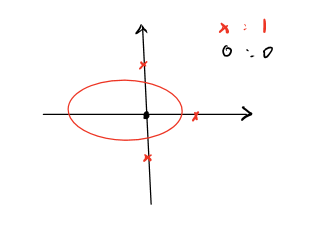





#### 3. In the following ﬁgure, there are diﬀerent SVMs with diﬀerent decision boundaries. The training data is labeled as zi ∈{−1,1}, represented as circles and squares respectively. Support vectors are drawn in solid circles. Determine which of the scenarios described below matches one of the 6 plots (note that one of the plots does not match any scenario). Each scenario should be matched to a unique plot. Explain your reason for matching each ﬁgure to each scenario.

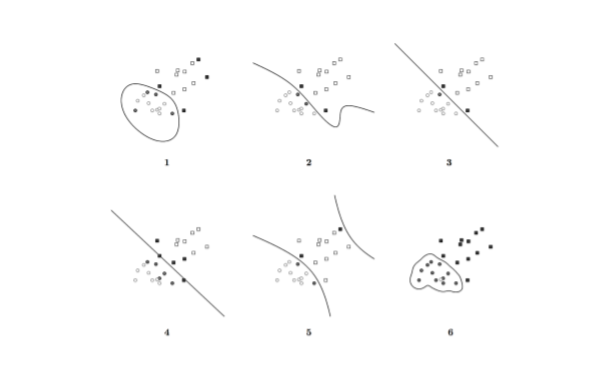

#### (a) A soft-margin linear SVM with C = 0.02

**Choose 4**, a linear decision boundary, comparing with c =20, c is small and the classifer is not perfect

#### (b) A soft-margin linear SVM with C = 20

**Choose 3**, a linear decision boundary, and the model will be better than c =0.02

#### (c) A hard-margin kernel SVM with $κ(x_i,x_j) = x_i^T x_j + (x_i^T x_j)^2$ 

**Choose 5**, the kernal function is 2nd plynomial, the curve should be elliptical or hyperbolic curve. Hence, choose 5, hyperbolic curve

##### (d) A hard-margin kernel SVM with $κ(x_i,x_j) = exp(−5||x_i −x_j||^2)$ 

**Choose 6**,the RBF kernel looks like a container, the larger$\gamma = 5$ will increase the variance of model

##### (e) A hard-margin kernel SVM with $κ(x_i,x_j) = exp(−\frac{1}{5}||x_i −x_j||^2)$ 

**Choose 1**,the RBF kernel looks like a container, the smaller $\gamma = 1/5$ will have the less variance model

#### 4. For the following classiﬁcation problem, design a single-layer perceptron, by using the multiclass Perceptron update rule. 

$$D_{w_1} = \{x_1 = \begin{bmatrix}1\\1\end{bmatrix}\}$$

$$D_{w_2} = \{x_2 = \begin{bmatrix}1\\-1\end{bmatrix}\}$$

$$D_{w_3} = \{x_3 = \begin{bmatrix}-1\\-1\end{bmatrix}\}$$

#### Use one-hot coding for classes, for example, ω3 should be represented using the following vector 

$$y_3 = \begin{bmatrix}-1\\-1\\1\end{bmatrix}$$

##### (a) Start with $W(0) = 0_{2×3}$ and choose $η(i) = 0.5$ in $W(i+1) = W(i)+η(i)x(i)e^T$. Do not use the augmented space and assume that the biases are always zero (no update for biases). Show multiple steps of your algorithm. Does it converge? Why? It is alright if you use a computer or calculator to perform the matrix calculations, but you should write down all the steps, and should not write a computer program to yield the ﬁnal results. 

$$w(i+1) = w(i)+0.5x(i)e^T(i)$$

$$w(0) = \begin{bmatrix}0& 0& 0\\ 0& 0 & 0\end{bmatrix}$$

$$y_1 = \begin{bmatrix}1\\-1\\-1\end{bmatrix}$$
$$y_2 = \begin{bmatrix}-1\\1\\-1\end{bmatrix}$$

$$w(1) = w(0)+0.5x(0)e^T(0)$$

$$e(i) = y_i - sign(w^T(i)x(i)+0)$$

**Iterations written by hand:**

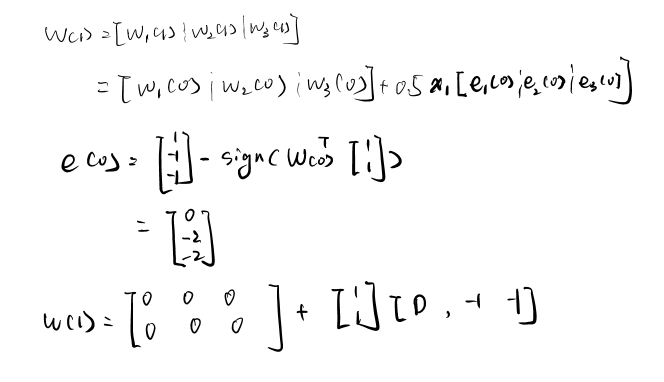

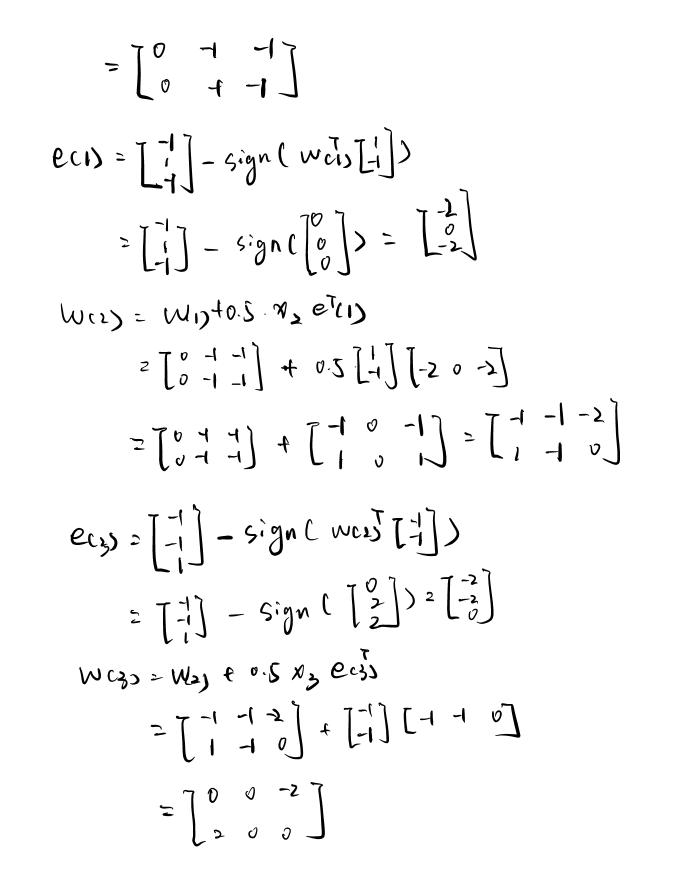

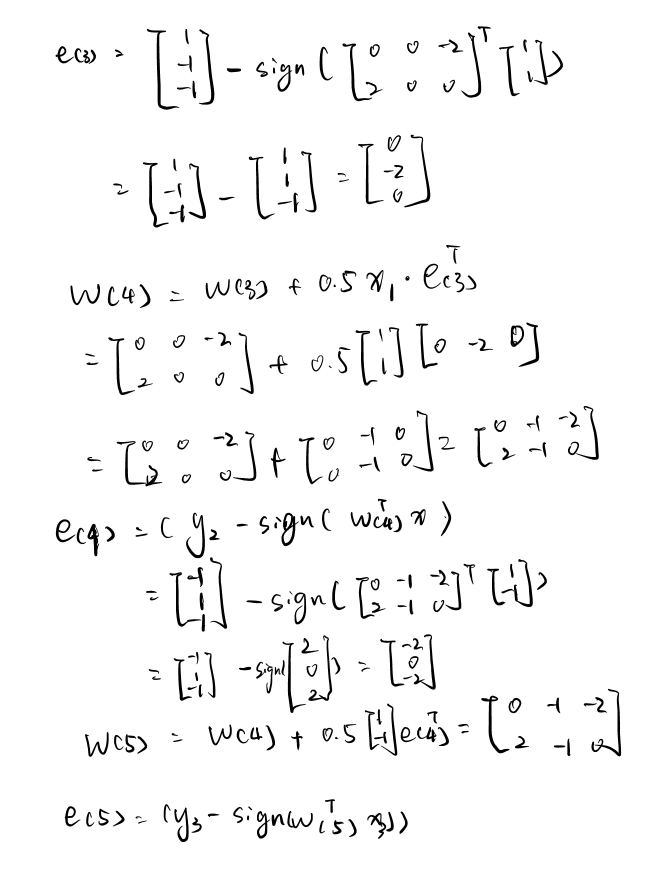

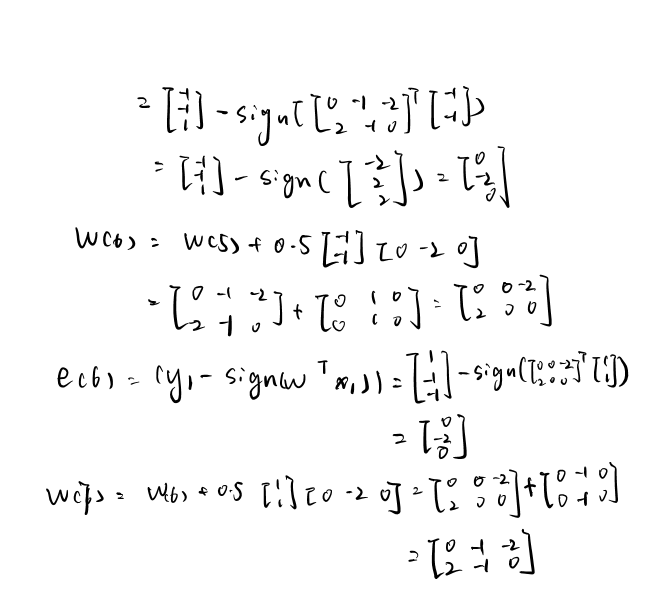

**From the iterations we can find that the w does not converge. w is recurrent between** $w = \begin{bmatrix}0& -1& -2\\ 2&-1 & 0\end{bmatrix}$ **and**
$w = \begin{bmatrix}0& 0& -2\\ 2& 0& 0\end{bmatrix}$

**The iteration doesn't converge because it didn't get a stable w value, the reason maybe we didn't add bias to the answer**

##### (b) Now redo the previous procedure, but this time deal with each of the columns of W as one perceptron, i.e. update each column (the weight associated with a linear discriminant) separately, for example the ﬁrst iteration becomes:


$$W(0)=[w_1(0)|w_2(0)|w_3(0)]$$

$$w_1(1) = w_1(0) + \eta e_1x(1)$$
$$w_2(1) = w_2(0) + \eta e_2x(1)$$
$$w_3(1) = w_3(0) + \eta e_3x(1)$$

##### where $e_i = y_{i1} −sign(w_i(0)^Tx(1))$is the diﬀerence between the $i_{th}$ element of $y_1$ (the target vector for $x_1$) and the output of the $i_{th}$ neuron/linear discriminant $w_i(1)$.


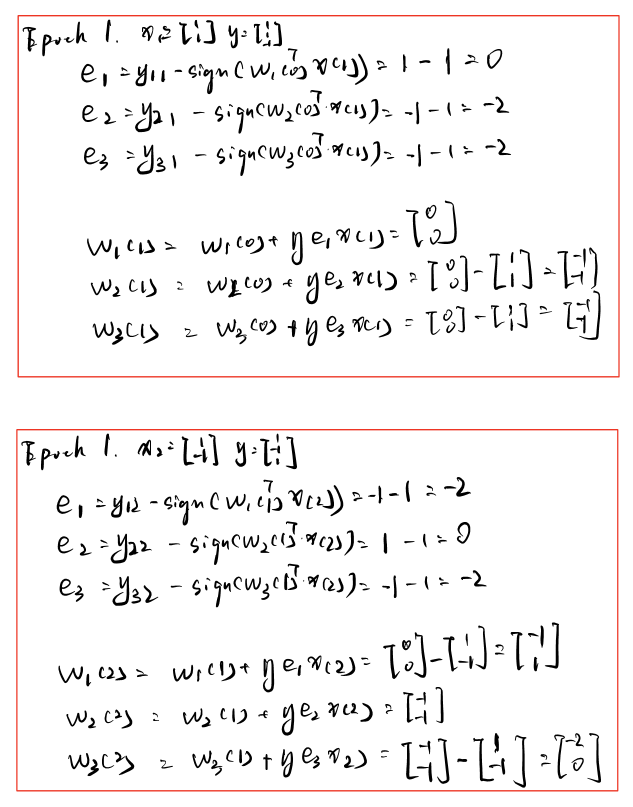

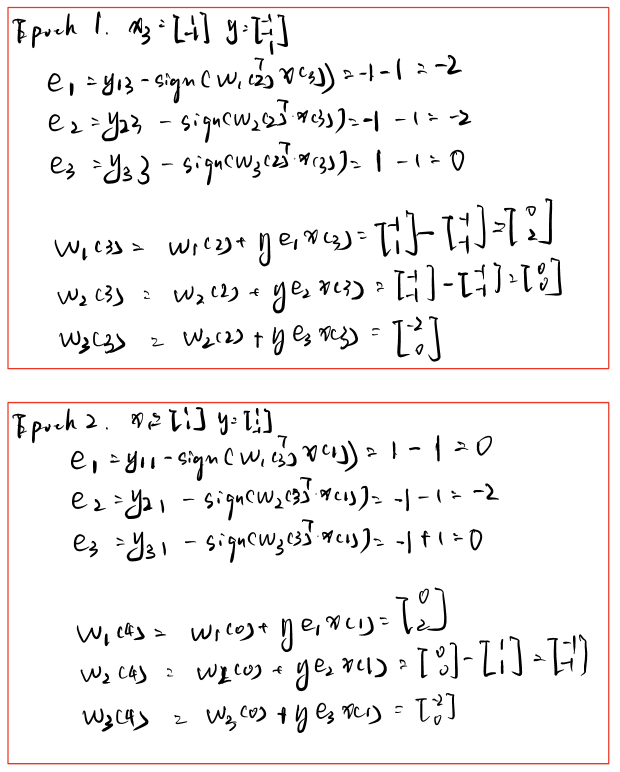

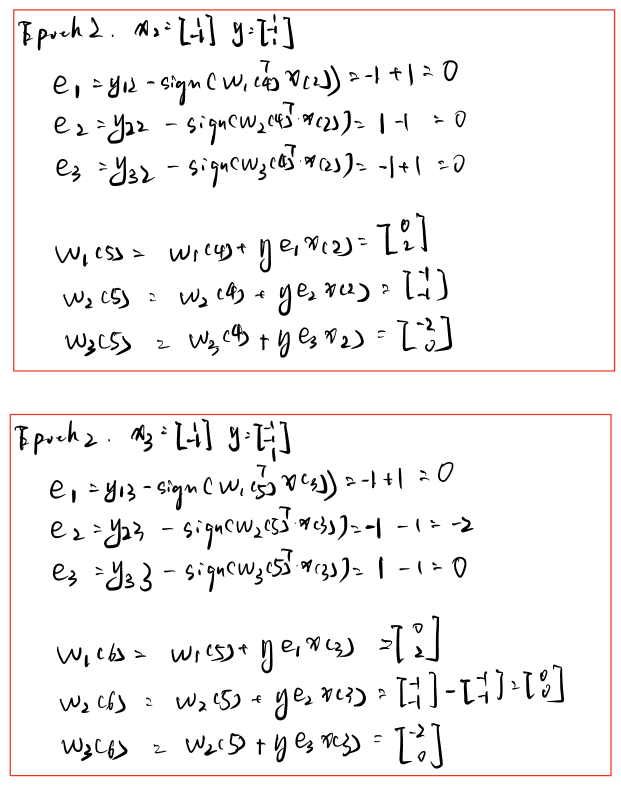

**From the deduce above, we reach the same answer as 4(a)**

#### 5. Consider the two classes of patterns that are shown in the ﬁgure below. Design a multilayer neural network with the following architecture to distinguish these categories.


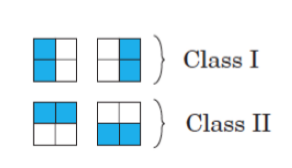

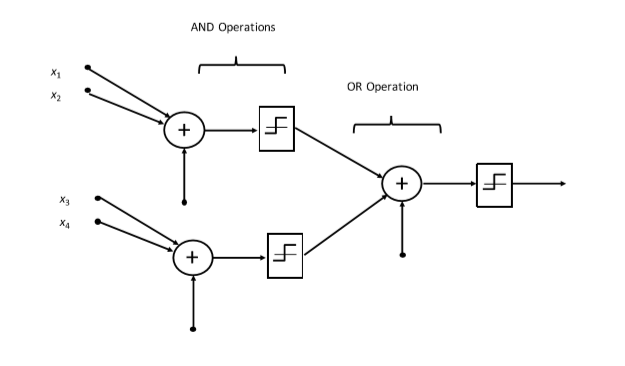

##### Step 1. define the Class I and Class II and  $x_1,x_2,x_3,x_4$

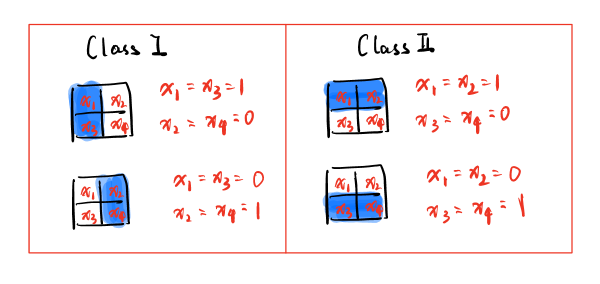

##### Step 2. Design the neural  network 

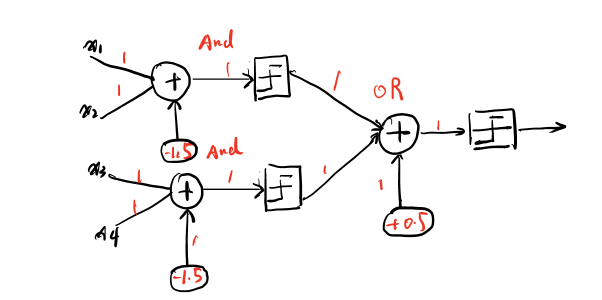

##### Step 3. Results for senarios

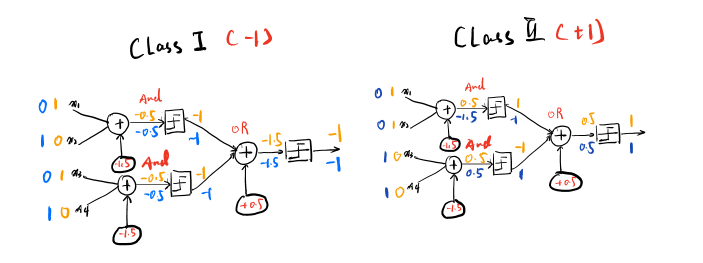